In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [225]:
data = pd.read_csv('car_price_data.csv')
data.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575.0
96,97,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7499.0
33,34,1,honda accord cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,6529.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
168,169,2,toyota corolla,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639.0


In [226]:
data.shape

(205, 26)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [228]:
data = data.drop(['car_ID'], axis=1)

In [229]:
data['CarName'].str.split(' ', expand=True)

,0,1,2,3,4
0,alfa-romero,giulia,None,None,None
1,alfa-romero,stelvio,None,None,None
2,alfa-romero,Quadrifoglio,None,None,None
3,audi,100,ls,None,None
4,audi,100ls,None,None,None
...,...,...,...,...,...
200,volvo,145e,(sw),None,None
201,volvo,144ea,None,None,None
202,volvo,244dl,None,None,None
203,volvo,246,None,None,None


In [230]:
data['CarName'] = data['CarName'].str.split(' ', expand=True) [0]
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [231]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                                           'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [232]:
data['symboling'] = data['symboling'].astype('str')
data['symboling'].unique()

array(['3', '1', '2', '0', '-1', '-2'], dtype=object)

### Selecting Categorical/Text columns


In [233]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols].head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


### Selecting Numerical columns


In [234]:
numerical_cols = data.select_dtypes(exclude=['object']).columns
data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


### EDA

In [235]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [236]:
df = pd.DataFrame(data['CarName'].value_counts()).reset_index().rename(
    columns={'count': 'CarName','count':'Count'})

In [237]:
df

,CarName,Count
0,toyota,32
1,Nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,subaru,12
6,volkswagen,12
7,volvo,11
8,peugeot,11
9,dodge,9


### Visualize different car names

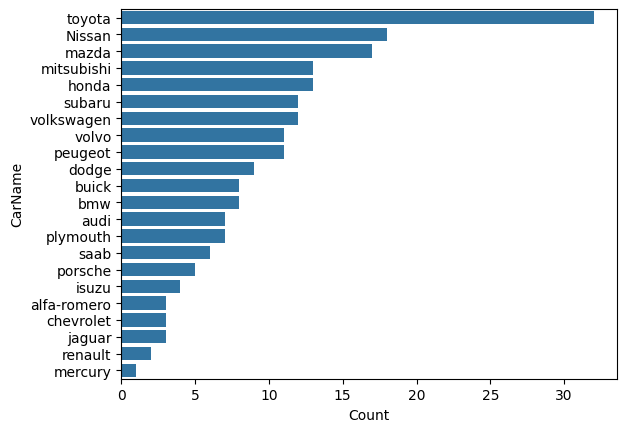

In [238]:
plot = sns.barplot(y='CarName', x='Count', data=df)

1. Toyota is the most popular car
2. Mercury is the least popular car

### Classification of Cars based on Fuel Type

Most of the car has gas fuel


<Axes: ylabel='count'>

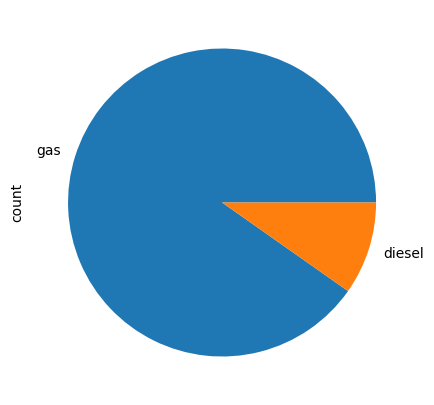

In [239]:
data['fueltype'].value_counts().plot.pie(y = 'fueltype',figsize=(5,5),)



### Price distribution of cars

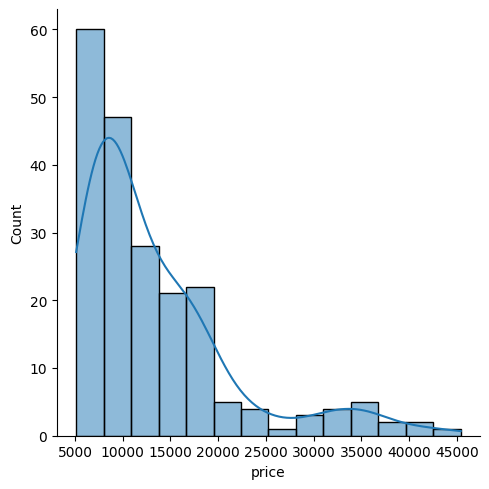

In [240]:
sns.displot(data['price'], kde=True);

Price distribution plot is right skewed

Maximum number of cars are in range of 20000

Text(0.5, 1.0, 'Distribution of ages of diesel vehicles')

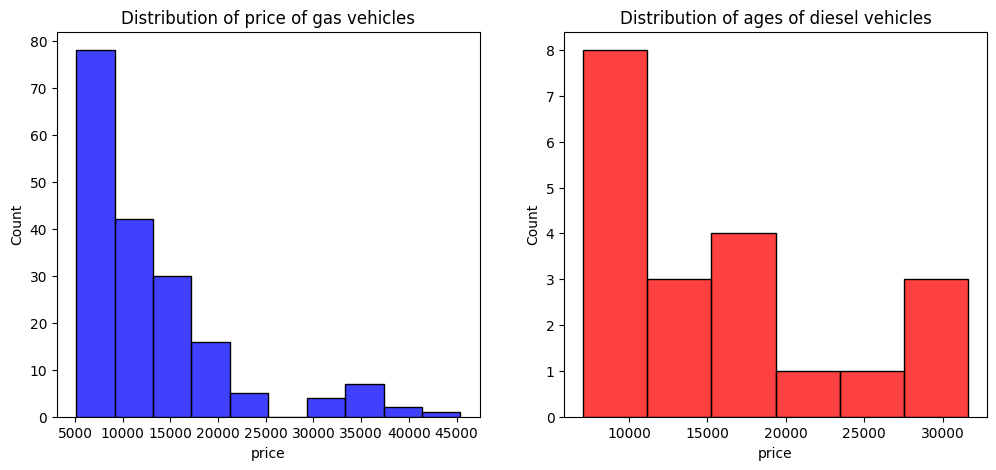

In [241]:
f = plt.figure(figsize=(12, 5))

ax = f.add_subplot(121)
sns.histplot(data[(data.fueltype == 'gas')]['price'], color='b', ax=ax,bins=10)
ax.set_title('Distribution of price of gas vehicles')

ax = f.add_subplot(122)
sns.histplot(data[(data.fueltype == 'diesel')]['price'], color='r', ax=ax)
ax.set_title('Distribution of ages of diesel vehicles')

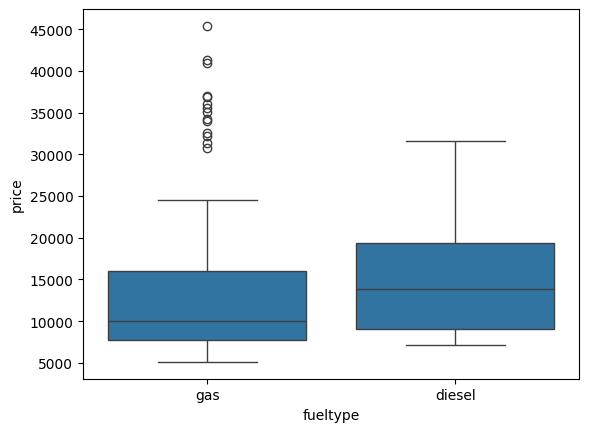

In [242]:
sns.boxplot(x='fueltype', y='price', data=data);

Price of diesel is much higher than of gas , also there are some outliers in gas vehicles

### Classification of Cars based on Aspiration Type

Most of the cars have standard aspiration

<Axes: ylabel='count'>

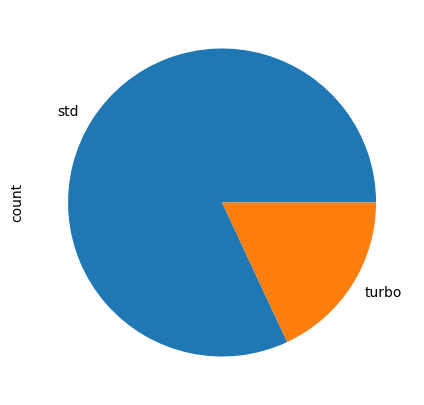

In [243]:
data['aspiration'].value_counts().plot.pie(y = 'aspiration',figsize=(5,5))

Text(0.5, 1.0, 'Price distribution of Std aspiration vehicles')

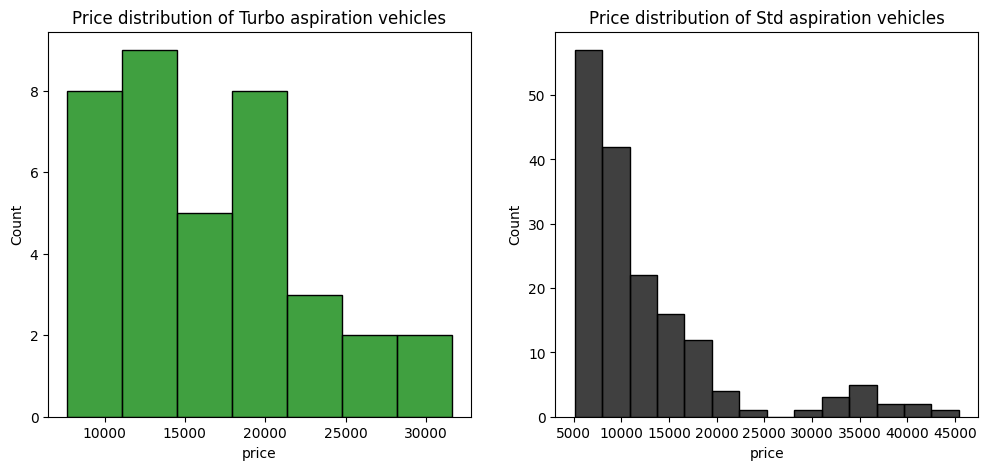

In [244]:
f = plt.figure(figsize=(12, 5))

ax = f.add_subplot(121)
plot = sns.histplot(data[(data.aspiration == 'turbo')]
                    ["price"], color='green', ax=ax)
ax.set_title('Price distribution of Turbo aspiration vehicles')

ax = f.add_subplot(122)
plot = sns.histplot(data[(data.aspiration == 'std')]
                    ['price'], color='k', ax=ax)
ax.set_title('Price distribution of Std aspiration vehicles')

C:\Users\danie\AppData\Local\Temp\ipykernel_10656\3263887945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='aspiration', y='price', data=data, palette='Pastel1')


<Axes: xlabel='aspiration', ylabel='price'>

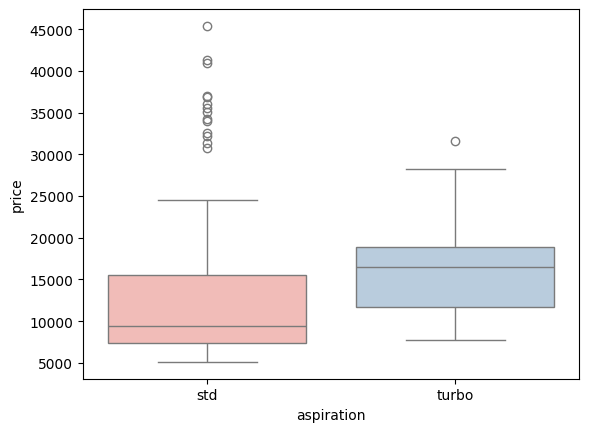

In [245]:
sns.boxplot(x='aspiration', y='price', data=data, palette='Pastel1')

In [246]:
df

,CarName,Count
0,toyota,32
1,Nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,subaru,12
6,volkswagen,12
7,volvo,11
8,peugeot,11
9,dodge,9


Price of turbo is higher in compared to std , although there are some outliers in std price

### Symboling

Cars are initially assigned a risk factor symbol associated with its price. 

A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

,symboling,Count
0,0,67
1,1,54
2,2,32
3,3,27
4,-1,22
5,-2,3


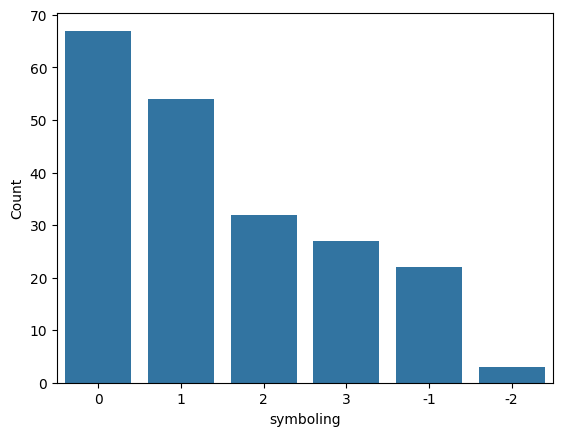

In [247]:
df = pd.DataFrame(data['symboling'].value_counts()).reset_index().rename(
    columns={'count': 'symboling', 'count': 'Count'})

sns.barplot(x='symboling', y='Count', data=df)
df


Most of the car symboling has 0 value

### Price distribution according to symboling

<Axes: xlabel='symboling', ylabel='price'>

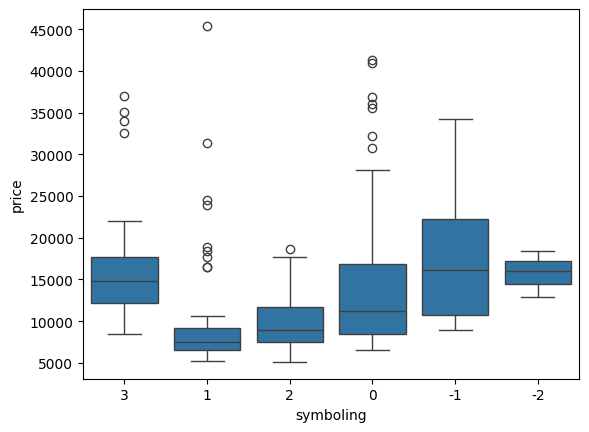

In [248]:
sns.boxplot(x='symboling', y='price', data=data)

Price of -1 symboling is higher in compare to others

### Door number

<Axes: ylabel='count'>

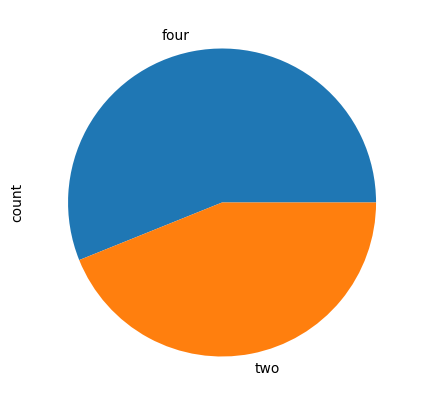

In [249]:
data['doornumber'].value_counts().plot.pie(y='doornumber', figsize=(5, 5))

### Price distribution according to door number

Text(0.5, 1.0, 'Price distribution of cars having four doors')

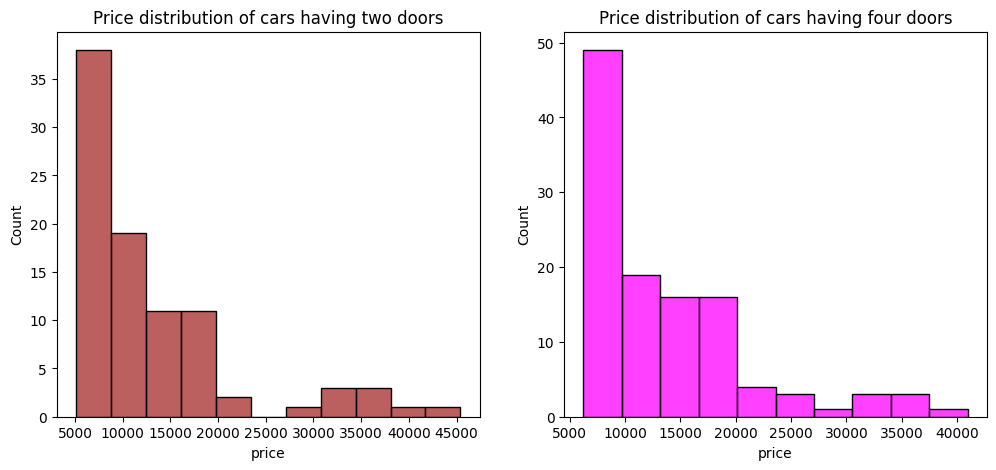

In [250]:
f = plt.figure(figsize=(12, 5))

ax = f.add_subplot(121)
plot = sns.histplot(data[(data.doornumber == 'two')]
                    ["price"], color='brown', ax=ax)
ax.set_title('Price distribution of cars having two doors')

ax = f.add_subplot(122)
plot = sns.histplot(data[(data.doornumber == 'four')]
                    ['price'], color='magenta', ax=ax)
ax.set_title('Price distribution of cars having four doors')

<Axes: xlabel='doornumber', ylabel='price'>

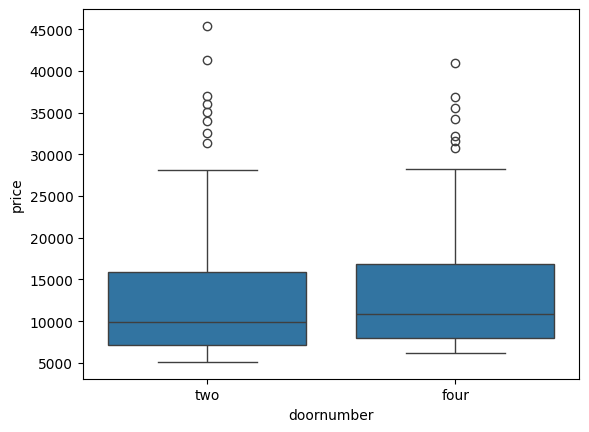

In [251]:
sns.boxplot(x='doornumber', y='price', data=data)

There is slight difference in distributions of cars having two doors vs cars having 4 doors

### Carbody

<Axes: ylabel='count'>

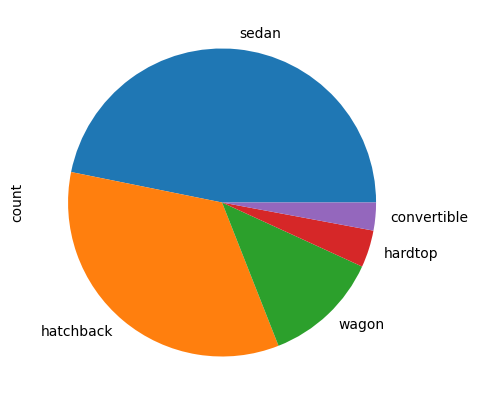

In [252]:
data['carbody'].value_counts().plot.pie(y='carbody', figsize=(5, 5))

Majority of car body are sedan and hatchback

### Price distribution according to car body

<Axes: xlabel='carbody', ylabel='price'>

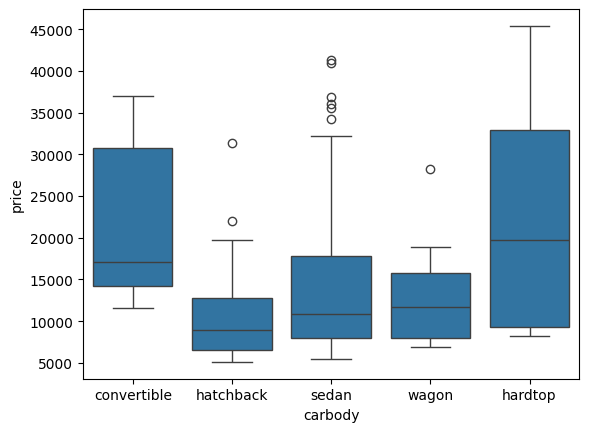

In [253]:
sns.boxplot(x='carbody', y='price', data=data)

Price of hardtop is very high compare to others

### Wheel base Vs Price

<Axes: xlabel='wheelbase', ylabel='price'>

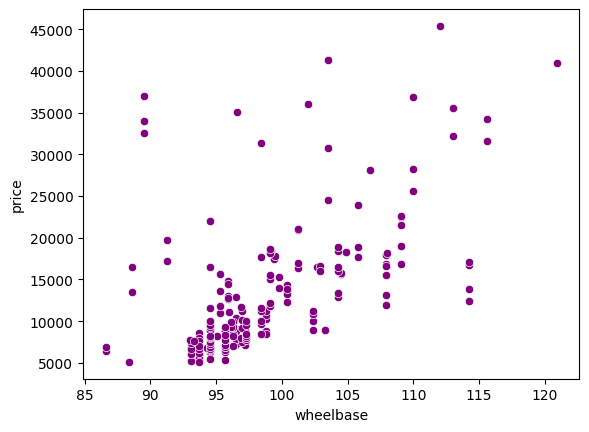

In [254]:
sns.scatterplot(x="wheelbase", y="price", data=data, color='purple')

<Axes: xlabel='carlength', ylabel='price'>

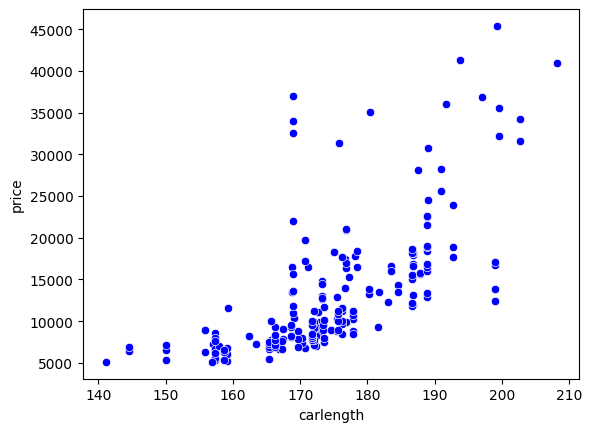

In [255]:
sns.scatterplot(x="carlength", y="price", data=data, color='b')

<Axes: xlabel='carwidth', ylabel='price'>

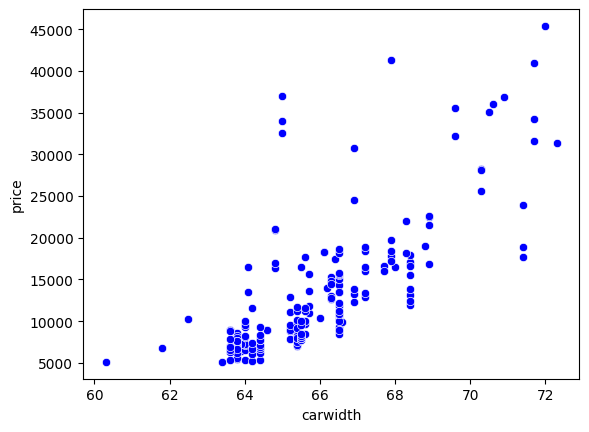

In [256]:
sns.scatterplot(x="carwidth", y="price", data=data, color='b')

<Axes: xlabel='curbweight', ylabel='price'>

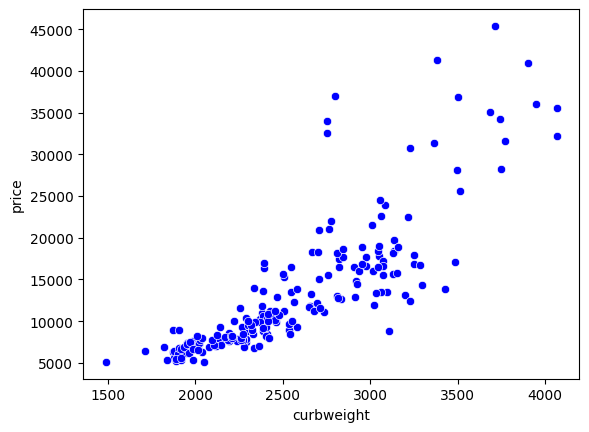

In [257]:
sns.scatterplot(x="curbweight", y="price", data=data, color='b')

<Axes: xlabel='enginesize', ylabel='price'>

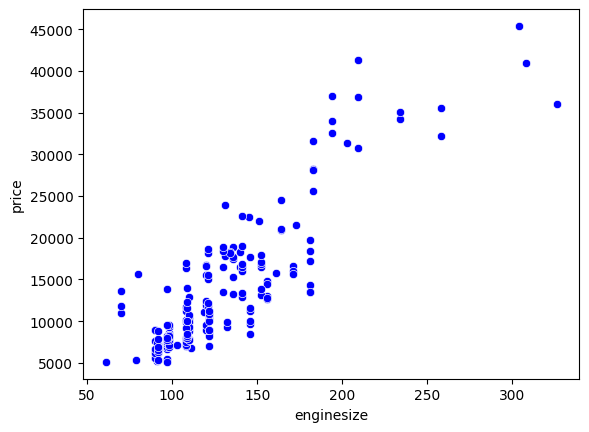

In [258]:
sns.scatterplot(x="enginesize", y="price", data=data, color='b')

<Axes: xlabel='horsepower', ylabel='price'>

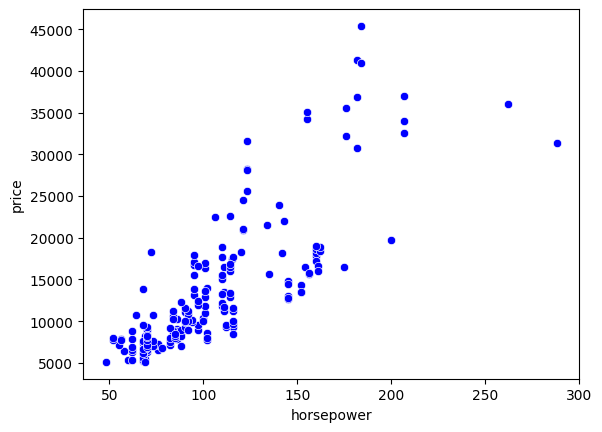

In [259]:
sns.scatterplot(x="horsepower", y="price", data=data, color='b')

In [260]:
data[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<Axes: >

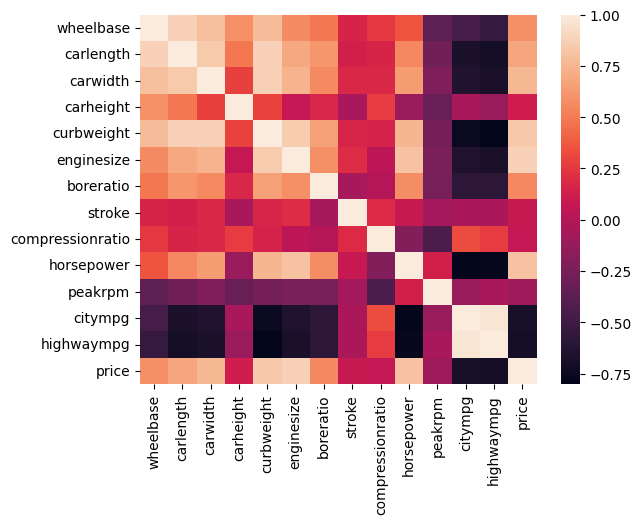

In [261]:
sns.heatmap(data[numerical_cols].corr())

wheelbase has high positive correlation with carlength, carwidth and curbweight

carlength has high postive correlation with curbweight

carlength has negative correlation with highwaympg

carwidth has high postive correlation with curbweight and engine size

enginesize has high positive correlation with horsepower

curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg

horsepower has negative correlation with citympg and highwaympg

citympg and highwaympg are highly correlated

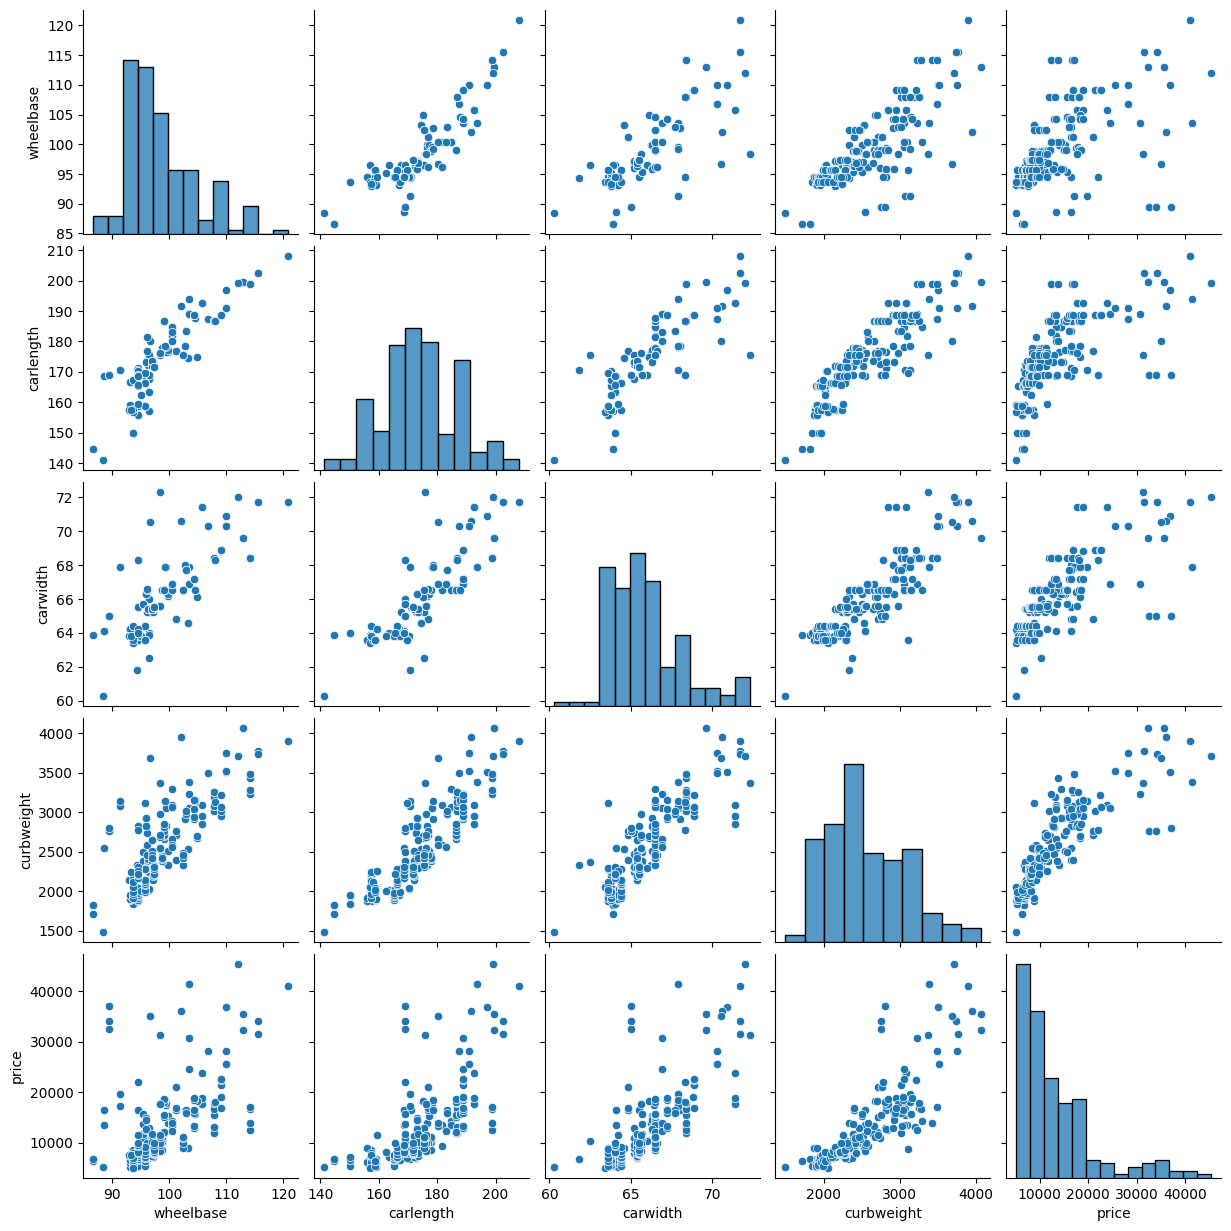

In [262]:
col = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'price']
sns.pairplot(data[col])

<Axes: >

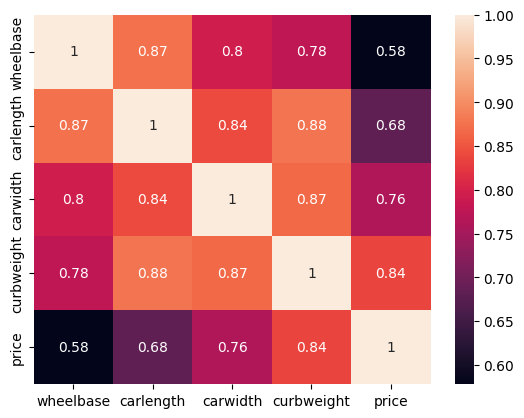

In [263]:
sns.heatmap(data[col].corr(), annot=True)

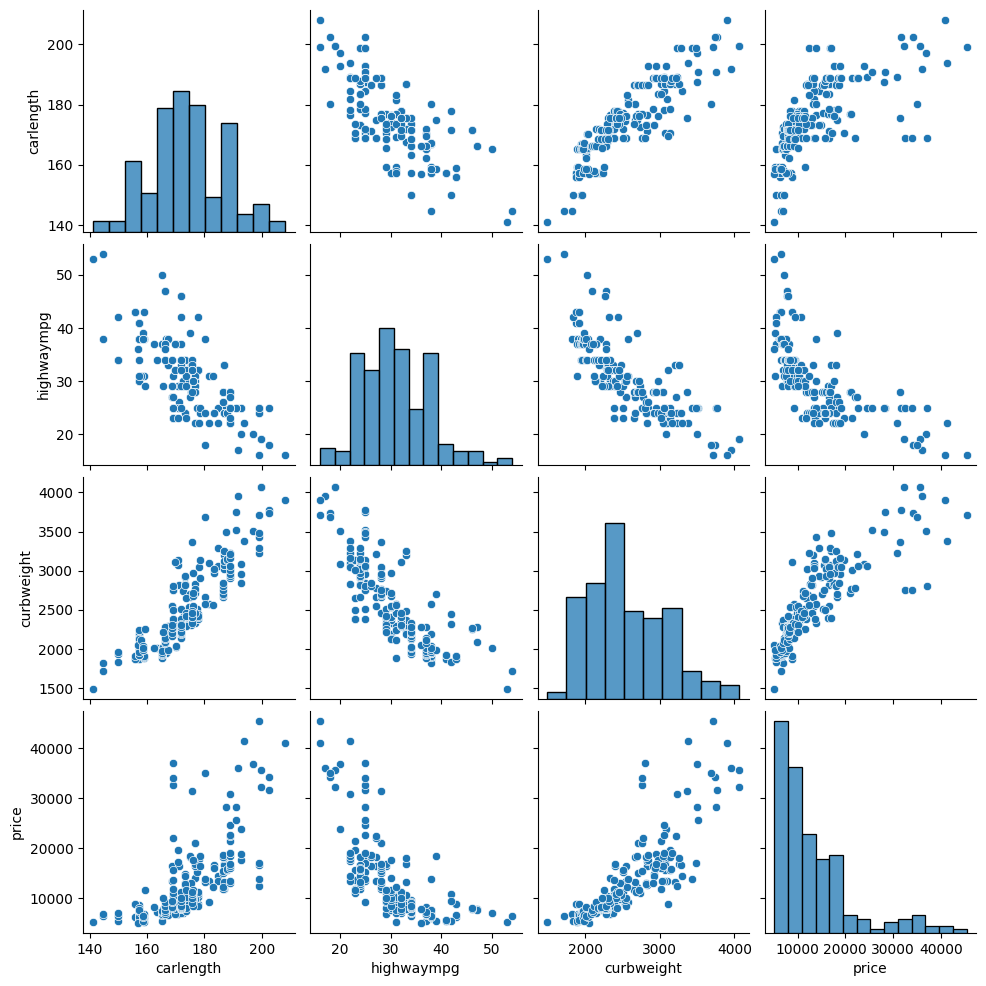

In [264]:
col = ['carlength', 'highwaympg', 'curbweight', 'price']
sns.pairplot(data[col])

<Axes: >

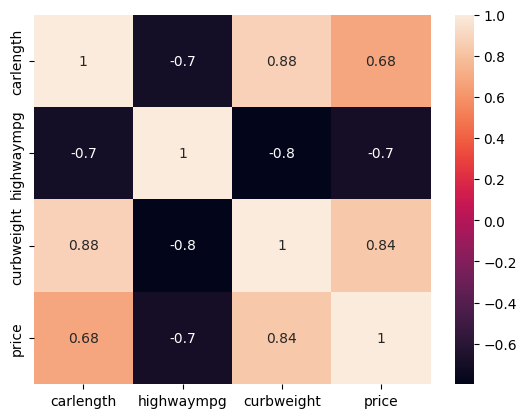

In [265]:
sns.heatmap(data[col].corr(), annot=True)

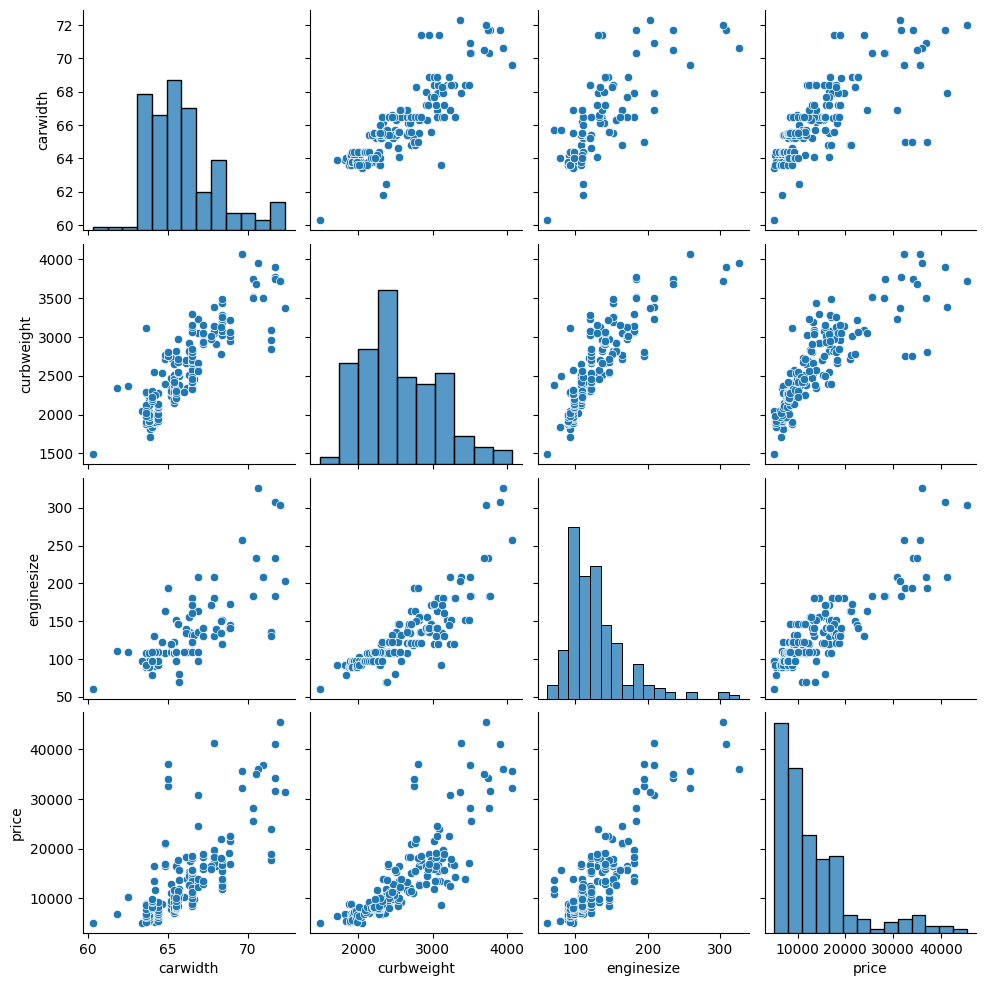

In [266]:
col = ['carwidth', 'curbweight', 'enginesize', 'price']
sns.pairplot(data[col])

<Axes: >

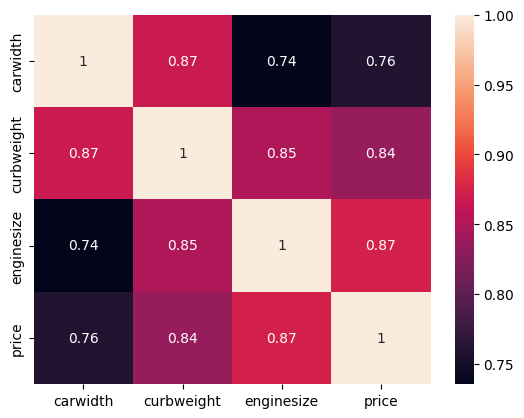

In [267]:
sns.heatmap(data[col].corr(), annot=True)

In [268]:
X = data[numerical_cols].drop('price', axis=1)
y = data['price']

In [269]:
X = data.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X = X.drop(['CarName', 'price'], axis=1)
y = data['price']

In [270]:
X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,5,1,0,1,0,2,0,2,22,8,...,2,18,5,23,4,13,30,10,8,10
1,5,1,0,1,0,2,0,2,22,8,...,2,18,5,23,4,13,30,10,8,10
2,3,1,0,1,2,2,0,10,29,16,...,3,28,5,1,28,13,45,10,6,9
3,4,1,0,0,3,1,0,30,45,21,...,2,11,5,13,25,22,27,16,11,13
4,4,1,0,0,3,0,0,28,45,23,...,1,22,5,13,25,5,33,16,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,0,0,3,2,0,46,63,34,...,2,24,5,35,15,20,32,15,10,11
201,0,1,1,0,3,2,0,46,63,33,...,2,24,5,35,15,11,48,14,6,8
202,0,1,0,0,3,2,0,46,63,34,...,3,33,5,26,7,12,38,16,5,6
203,0,0,1,0,3,2,0,46,63,34,...,3,25,3,6,25,31,28,8,13,10


In [271]:
cols_to_use = ['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
               'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
               'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [272]:
X = X[cols_to_use]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Linear Regression

In [273]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [274]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 4424.238438518743


In [275]:
r2_value = model.score(X_test, y_test)
r2_value

0.7375029659751732

In [276]:
y.min(), y.max(), y.mean()

(np.float64(5118.0), np.float64(45400.0), np.float64(13276.710570731706))

### Label Encoder - Explanation

In [277]:
from sklearn.preprocessing import LabelEncoder

# Sample categorical labels
labels = ['cat', 'dog', 'bird', 'dog', 'bird', 'cat']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
numeric_labels = label_encoder.fit_transform(labels)

# Print the mapping of original labels to numeric labels
label_mapping = dict(zip(labels, numeric_labels))
print("Label Mapping:", label_mapping)

# Print the transformed numeric labels
print("Numeric Labels:", numeric_labels)


Label Mapping: {'cat': np.int64(1), 'dog': np.int64(2), 'bird': np.int64(0)}
Numeric Labels: [1 2 0 2 0 1]
